In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

2021-12-23 14:55:27.633652: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/travis/anaconda3/envs/3d/lib/python3.8/site-packages/cv2/../../lib64:
2021-12-23 14:55:27.633693: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [1]:
# Get Cropping Coordinates


# importing the module
import cv2

cropping_cords = []

# function to display the coordinates of
# of the points clicked on the image
def click_event(event, x, y, flags, params):
    global cropping_cords
 
    # checking for left mouse clicks
    if event == cv2.EVENT_LBUTTONDOWN:
 
        # displaying the coordinates
        # on the Shell
        print(x, ' ', y)
 
        # displaying the coordinates
        # on the image window
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, str(x) + ',' +
                    str(y), (x,y), font,
                    1, (255, 0, 0), 2)
        cv2.imshow('image', img)

        cropping_cords = [x,y]

 

 
# reading the image
img = cv2.imread('/home/travis/repos/youtube_videos/screen_input_classification_labeling/screenshots/frame4133_34.jpg', 1)

# displaying the image
cv2.imshow('image', img)

# setting mouse handler for the image
# and calling the click_event() function
test = cv2.setMouseCallback('image', click_event)

# wait for a key to be pressed to exit
cv2.waitKey(0)

# close the window
cv2.destroyAllWindows()

434   221


In [2]:
# Dataset preparation
import glob
import shutil
import os
import matplotlib.pyplot as plt

images = glob.glob('./screenshots/*.jpg')

print(images[0])

for i in images:
    label = i.split('_')[-1].replace('.jpg', '')
    label_file = os.path.join('screenshots', label)
    if not os.path.exists(label_file):
        os.mkdir(label_file)

    img = cv2.imread(i)
    crop_img = img[0:cropping_cords[1], 0:cropping_cords[0]]

    # plt.imshow(crop_img)

    cv2.imwrite(os.path.join(label_file, os.path.join(os.path.basename(i))), crop_img)
    # shutil.copy(i,os.path.join(label_file, os.path.join(os.path.basename(i))) )
    



./screenshots/frame559_0.jpg


In [5]:
# dataset load
data_dir = './screenshots'

batch_size = 32
crop_img.shape

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
#   image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4062 files belonging to 16 classes.
Using 3250 files for training.


2021-12-23 14:55:35.643857: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-23 14:55:35.644187: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/travis/anaconda3/envs/3d/lib/python3.8/site-packages/cv2/../../lib64:
2021-12-23 14:55:35.644277: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/travis/anaconda3/envs/3d/lib/python3.8/site-packages/cv2/../../lib64:
2021-12-23 14:55:35.644343: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.

In [6]:


val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  # image_size=(256,256),
  batch_size=batch_size)

Found 4062 files belonging to 16 classes.
Using 812 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)

['0', '1', '12', '123', '1234', '124', '13', '134', '14', '2', '23', '234', '24', '3', '34', '4']


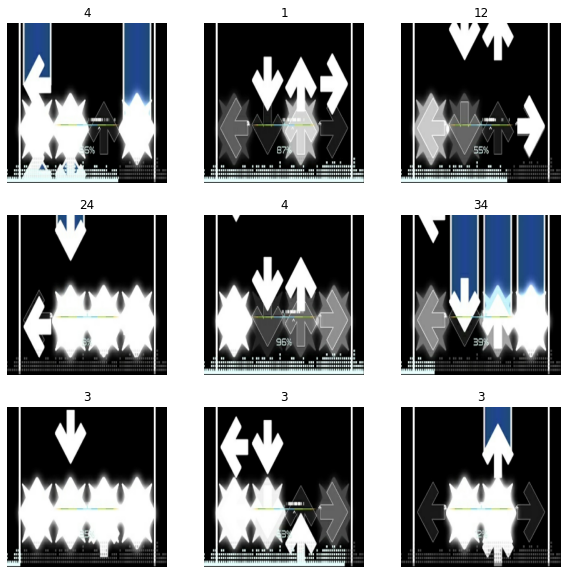

In [8]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [9]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


In [10]:
normalization_layer = layers.Rescaling(1./255)


In [11]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [12]:
num_classes = len(class_names)

print(crop_img.shape)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(256,256, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

(221, 434, 3)


2021-12-23 14:55:52.325613: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 33554432 exceeds 10% of free system memory.
2021-12-23 14:55:52.349701: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 33554432 exceeds 10% of free system memory.
2021-12-23 14:55:52.361492: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 33554432 exceeds 10% of free system memory.


In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        1

In [15]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


2021-12-23 14:56:02.709575: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 33554432 exceeds 10% of free system memory.
2021-12-23 14:56:02.723330: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 33554432 exceeds 10% of free system memory.


102/102 [==============================] - 131s 1s/step - loss: 2.5533 - accuracy: 0.2317 - val_loss: 2.1958 - val_accuracy: 0.3054
Epoch 2/10
102/102 [==============================] - 129s 1s/step - loss: 2.0074 - accuracy: 0.3545 - val_loss: 2.0572 - val_accuracy: 0.3387
Epoch 3/10
102/102 [==============================] - 129s 1s/step - loss: 1.7654 - accuracy: 0.4329 - val_loss: 2.0209 - val_accuracy: 0.3411
Epoch 4/10
102/102 [==============================] - 128s 1s/step - loss: 1.5584 - accuracy: 0.4914 - val_loss: 2.1270 - val_accuracy: 0.3571
Epoch 5/10
102/102 [==============================] - 120s 1s/step - loss: 1.3676 - accuracy: 0.5471 - val_loss: 2.1033 - val_accuracy: 0.3534
Epoch 6/10
102/102 [==============================] - 120s 1s/step - loss: 1.1538 - accuracy: 0.6215 - val_loss: 2.3819 - val_accuracy: 0.3670
Epoch 7/10
102/102 [==============================] - 120s 1s/step - loss: 0.9896 - accuracy: 0.6662 - val_loss: 2.5895 - val_accuracy: 0.3387
Epoch 8/10

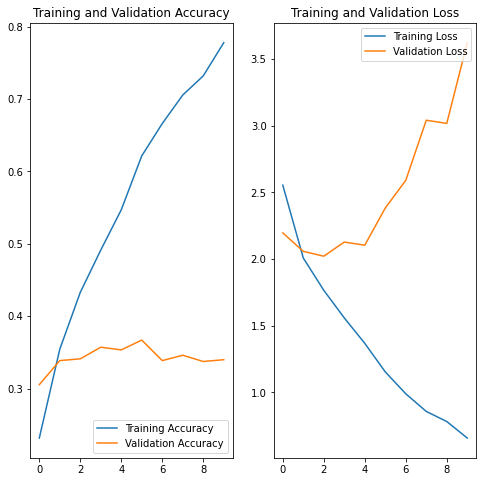

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
model.save('./brandon_weights.pth')

2021-12-23 15:26:10.043085: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ./brandon_weights.pth/assets
